In [1]:
!pip install numpy
!pip install pandas
!pip install jupyter
!pip install matplotlib
!pip install scikit-learn
!pip install Pillow
!pip install opencv-python
!pip install img2vec_pytorch

## 一、传统偏好发现

### 年龄偏好分析

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
R=ratings.groupby('movie_id')['rating'].mean()
N=ratings.groupby('movie_id')['rating'].count()
popular=pd.DataFrame({'rating':R,'count':N})
W=popular['count'].apply(lambda x: max(0.5*x/popular['count'].mean(),1))
popular['rating']=W*popular['rating']+(1-W)*popular['rating'].mean()
popular=popular.sort_values(by='rating',ascending=False)
popular_percentile=popular['rating'].quantile(0.9)
popular=popular[popular['rating']>=popular_percentile]
print(popular)

             rating  count
movie_id                  
2858      10.088146   3428
260        9.970312   2991
1196       9.077795   2990
1198       9.008716   2514
318        8.667024   2227
...             ...    ...
1280       4.173285    277
955        4.169492    413
2726       4.169231    130
2948       4.168559    771
3424       4.167839    781

[371 rows x 2 columns]


In [4]:
age_users = pd.merge(users, ratings, on='user_id', how='outer')
age_users = age_users[age_users['movie_id'].isin(popular.index)]
display(age_users)
# 得到有哪些年龄段
unique_age_descriptions = age_users['age_desc'].unique()
print(unique_age_descriptions)

,user_id,gender,zipcode,age_desc,occ_desc,movie_id,rating,timestamp
0,1,F,48067,Under 18,K-12 student,1193,5,978300760
2,1,F,48067,Under 18,K-12 student,914,3,978301968
3,1,F,48067,Under 18,K-12 student,3408,4,978300275
4,1,F,48067,Under 18,K-12 student,2355,5,978824291
5,1,F,48067,Under 18,K-12 student,1197,3,978302268
...,...,...,...,...,...,...,...,...
1000201,6040,M,11106,25-34,doctor/health care,1080,4,957717322
1000202,6040,M,11106,25-34,doctor/health care,1089,4,956704996
1000203,6040,M,11106,25-34,doctor/health care,1090,3,956715518
1000205,6040,M,11106,25-34,doctor/health care,1094,5,956704887


['Under 18' '56+' '25-34' '45-49' '50-55' '35-44' '18-24']


In [5]:
mean_ratings_by_age_movie = age_users.groupby(['age_desc', 'movie_id'])['rating'].mean().unstack()
display(mean_ratings_by_age_movie)

movie_id,1,6,11,17,21,32,34,36,39,47,...,3730,3751,3753,3789,3793,3801,3881,3888,3897,3911
age_desc,,,,,,,,,,,,,,,,,,,,,
18-24,4.017857,4.027149,3.693989,3.982906,3.613208,4.092105,3.609929,3.975460,3.551205,4.309764,...,4.354839,3.900794,3.780919,4.000000,3.938875,4.400000,5.0,NaN,4.286996,4.009174
25-34,4.201266,3.911058,3.734848,4.010239,3.557047,3.979412,3.957813,3.898123,3.651376,4.074349,...,4.196850,3.896552,3.622030,3.866667,3.851330,4.081081,NaN,NaN,4.196850,4.058608
35-44,4.302600,3.759494,3.848341,4.000000,3.651852,3.897059,4.023684,4.011628,3.659389,4.018868,...,4.267857,3.826990,3.791667,4.529412,3.757322,4.076923,NaN,5.0,4.116959,4.000000
45-49,4.104895,3.711111,3.988889,4.191011,3.798077,3.611650,4.045161,3.892857,3.706522,3.941176,...,4.179104,4.029412,3.811881,3.920000,3.633803,4.230769,NaN,4.0,4.194444,4.250000
50-55,4.092593,3.576923,3.975000,4.096386,3.750000,3.720930,3.960938,4.027778,3.704918,3.651163,...,4.358209,3.878049,3.950617,4.208333,3.360000,4.200000,NaN,NaN,4.456140,4.159091
56+,3.886792,3.703704,3.884615,4.019608,3.727273,3.620690,3.948052,4.056604,3.829268,4.000000,...,4.219512,3.927273,3.803030,4.312500,3.230769,4.477273,NaN,NaN,4.238095,4.428571
Under 18,3.919643,3.904762,3.476190,3.750000,3.576923,4.189189,3.325843,4.454545,3.290323,4.137931,...,4.250000,3.589286,3.944444,5.000000,3.805195,4.333333,NaN,NaN,4.333333,3.772727


### 对于每个年龄段分别和其他的所有做绝对值差*ln（观影人数）作为评分函数

In [6]:
Under_18_users = age_users[age_users['age_desc'] == 'Under 18']
else_users = age_users[age_users['age_desc'] != 'Under 18']

Under_18_users_mean = Under_18_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = Under_18_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
print(score)
score['score'] = score['rating_x'] * score['rating_y']
Under_18_preference = score.nlargest(10, 'score').reset_index()
print("18岁以下最偏好的10部电影：")
Under_18_preference_detail = pd.merge(Under_18_preference, movies, on='movie_id', how='inner')
Under_18_preference_detail = Under_18_preference_detail.drop(['rating_x', 'rating_y', 'score', 'count', 'movie_id'], axis=1) # 去除无需展示的列
Under_18_preference_detail['ranking'] = Under_18_preference_detail.index.to_series().apply(lambda x: x+1)
Under_18_preference_detail = Under_18_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(Under_18_preference_detail)

          rating_x  rating_y  count
movie_id                           
1        -0.240154  6.732588   2077
6         0.026634  4.353130    940
11       -0.324205  4.300855   1033
17       -0.282967  4.458884    835
21       -0.047889  4.206071   1356
...            ...       ...    ...
3801      0.103741  4.231156    199
3881           NaN  5.000000      1
3888           NaN  4.500000      2
3897      0.112403  5.057308    994
3911     -0.310737  4.254213    657

[371 rows x 3 columns]
18岁以下最偏好的10部电影：


,title,genres
ranking,,
1,GoodFellas (1990),Crime|Drama
2,Aparajito (1956),Drama
3,Trust (1990),Comedy|Drama
4,"Pawnbroker, The (1965)",Drama
5,Paradise Lost: The Child Murders at Robin Hood...,Documentary
6,"Thin Blue Line, The (1988)",Documentary
7,Seven Days in May (1964),Thriller
8,"Palm Beach Story, The (1942)",Comedy
9,Central Station (Central do Brasil) (1998),Drama


In [7]:
_18_24_users = age_users[age_users['age_desc'] == '18-24']
else_users = age_users[age_users['age_desc'] != '18-24']

_18_24_users_mean = _18_24_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _18_24_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_18_24_preference = score.nlargest(10, 'score').reset_index()
print("18-24岁最偏好的10部电影：")
_18_24_preference_detail = pd.merge(_18_24_preference, movies, on='movie_id', how='inner')
_18_24_preference_detail = _18_24_preference_detail.drop(['rating_x', 'rating_y', 'count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_18_24_preference_detail['ranking'] = _18_24_preference_detail.index.to_series().apply(lambda x: x+1)
_18_24_preference_detail = _18_24_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_18_24_preference_detail)

18-24岁最偏好的10部电影：


,title,genres
ranking,,
1,Dangerous Game (1993),Drama
2,"Face in the Crowd, A (1957)",Drama
3,American Beauty (1999),Comedy|Drama
4,"Palm Beach Story, The (1942)",Comedy
5,Fight Club (1999),Drama
6,NÃ©nette et Boni (1996),Drama
7,Sanjuro (1962),Action|Adventure
8,Before the Rain (Pred dozhdot) (1994),Drama
9,Pather Panchali (1955),Drama


In [8]:
_25_34_users = age_users[age_users['age_desc'] == '25-34']
else_users = age_users[age_users['age_desc'] != '25-34']

_25_34_users_mean = _25_34_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _25_34_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_25_34_preference = score.nlargest(10, 'score').reset_index()
print("25-34岁最偏好的10部电影：")
_25_34_preference_detail = pd.merge(_25_34_preference, movies, on='movie_id', how='inner')
_25_34_preference_detail = _25_34_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_25_34_preference_detail['ranking'] = _25_34_preference_detail.index.to_series().apply(lambda x: x+1)
_25_34_preference_detail = _25_34_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_25_34_preference_detail)

25-34岁最偏好的10部电影：


,title,genres
ranking,,
1,"CallejÃ³n de los milagros, El (1995)",Drama
2,"Inheritors, The (Die Siebtelbauern) (1998)",Drama
3,Return with Honor (1998),Documentary
4,Soft Fruit (1999),Comedy|Drama
5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
6,"Decline of Western Civilization, The (1981)",Documentary
7,"Eighth Day, The (Le HuitiÃ¨me jour ) (1996)",Drama
8,"Good, The Bad and The Ugly, The (1966)",Action|Western
9,"Breakfast Club, The (1985)",Comedy|Drama


In [9]:
_35_44_users = age_users[age_users['age_desc'] == '35-44']
else_users = age_users[age_users['age_desc'] != '35-44']

_35_44_users_mean = _35_44_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _35_44_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_35_44_preference = score.nlargest(10, 'score').reset_index()
print("35-44岁最偏好的10部电影：")
_35_44_preference_detail = pd.merge(_35_44_preference, movies, on='movie_id', how='inner')
_35_44_preference_detail = _35_44_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_35_44_preference_detail['ranking'] = _35_44_preference_detail.index.to_series().apply(lambda x: x+1)
_35_44_preference_detail = _35_44_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_35_44_preference_detail)

35-44岁最偏好的10部电影：


,title,genres
ranking,,
1,Window to Paris (1994),Comedy
2,Skipped Parts (2000),Drama|Romance
3,Firelight (1997),Drama
4,Time of the Gypsies (Dom za vesanje) (1989),Drama
5,Jupiter's Wife (1994),Documentary
6,"Apple, The (Sib) (1998)",Drama
7,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical
8,Lamerica (1994),Drama
9,"Pawnbroker, The (1965)",Drama


In [10]:
_45_49_users = age_users[age_users['age_desc'] == '45-49']
else_users = age_users[age_users['age_desc'] != '45-49']

_45_49_users_mean = _45_49_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _45_49_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_45_49_preference = score.nlargest(10, 'score').reset_index()
print("45-49岁最偏好的10部电影：")
_45_49_preference_detail = pd.merge(_45_49_preference, movies, on='movie_id', how='inner')
_45_49_preference_detail = _45_49_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_45_49_preference_detail['ranking'] = _45_49_preference_detail.index.to_series().apply(lambda x: x+1)
_45_49_preference_detail = _45_49_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_45_49_preference_detail)

45-49岁最偏好的10部电影：


,title,genres
ranking,,
1,Jupiter's Wife (1994),Documentary
2,Before the Rain (Pred dozhdot) (1994),Drama
3,For All Mankind (1989),Documentary
4,"Face in the Crowd, A (1957)",Drama
5,42 Up (1998),Documentary
6,Misery (1990),Horror
7,Sleepless in Seattle (1993),Comedy|Romance
8,"Bicycle Thief, The (Ladri di biciclette) (1948)",Drama
9,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


In [11]:
_50_55_users = age_users[age_users['age_desc'] == '50-55']
else_users = age_users[age_users['age_desc'] != '50-55']

_50_55_users_mean = _50_55_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _50_55_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_50_55_preference = score.nlargest(10, 'score').reset_index()
print("50-55岁最偏好的10部电影：")
_50_55_preference_detail = pd.merge(_50_55_preference, movies, on='movie_id', how='inner')
_50_55_preference_detail = _50_55_preference_detail.drop(['rating_x', 'rating_y', 'count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_50_55_preference_detail['ranking'] =_50_55_preference_detail.index.to_series().apply(lambda x: x+1)
_50_55_preference_detail = _50_55_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_50_55_preference_detail)

50-55岁最偏好的10部电影：


,title,genres
ranking,,
1,Dry Cleaning (Nettoyage Ã sec) (1997),Drama
2,"Bells, The (1926)",Crime|Drama
3,Ed's Next Move (1996),Comedy
4,Before the Rain (Pred dozhdot) (1994),Drama
5,To Live (Huozhe) (1994),Drama
6,Sleepless in Seattle (1993),Comedy|Romance
7,M*A*S*H (1970),Comedy|War
8,"Apple, The (Sib) (1998)",Drama
9,Yojimbo (1961),Comedy|Drama|Western


In [12]:
_56_users = age_users[age_users['age_desc'] == '56+']
else_users = age_users[age_users['age_desc'] != '56+']

_56_users_mean = _56_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _56_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_56_preference = score.nlargest(10, 'score').reset_index()
print("56岁以上最偏好的10部电影：")
_56_preference_detail = pd.merge(_56_preference, movies, on='movie_id', how='inner')
_56_preference_detail = _56_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_56_preference_detail['ranking'] =_56_preference_detail.index.to_series().apply(lambda x: x+1)
_56_preference_detail = _56_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_56_preference_detail)

56岁以上最偏好的10部电影：


,title,genres
ranking,,
1,Firelight (1997),Drama
2,Aparajito (1956),Drama
3,"Conformist, The (Il Conformista) (1970)",Drama
4,Paradise Lost: The Child Murders at Robin Hood...,Documentary
5,Before the Rain (Pred dozhdot) (1994),Drama
6,Return with Honor (1998),Documentary
7,Soft Fruit (1999),Comedy|Drama
8,"Decline of Western Civilization, The (1981)",Documentary
9,Creature Comforts (1990),Animation|Comedy


### 不同类型电影的不同年龄段偏好可视化

In [13]:
data = pd.merge(ratings, users, how='outer')
data = pd.merge(data, movies, how='outer')
data = data.dropna(subset=['age_desc'])
data

,user_id,movie_id,rating,timestamp,gender,zipcode,age_desc,occ_desc,title,genres
0,1.0,1,5.0,9.788243e+08,F,48067,Under 18,K-12 student,Toy Story (1995),Animation|Children's|Comedy
1,6.0,1,4.0,9.782370e+08,F,55117,50-55,homemaker,Toy Story (1995),Animation|Children's|Comedy
2,8.0,1,4.0,9.782335e+08,M,11413,25-34,programmer,Toy Story (1995),Animation|Children's|Comedy
3,9.0,1,5.0,9.782260e+08,M,61614,25-34,technician/engineer,Toy Story (1995),Animation|Children's|Comedy
4,10.0,1,5.0,9.782265e+08,F,95370,35-44,academic/educator,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000381,5812.0,3952,4.0,9.920721e+08,F,92120,25-34,executive/managerial,"Contender, The (2000)",Drama|Thriller
1000382,5831.0,3952,3.0,9.862231e+08,M,92120,25-34,academic/educator,"Contender, The (2000)",Drama|Thriller
1000383,5837.0,3952,4.0,1.011903e+09,M,60607,25-34,executive/managerial,"Contender, The (2000)",Drama|Thriller
1000384,5927.0,3952,1.0,9.798525e+08,M,10003,35-44,sales/marketing,"Contender, The (2000)",Drama|Thriller


In [14]:
age_groups = data['age_desc'].unique()  # 获取所有独特的年龄段描述

# 为每个年龄段创建一个字典来存储数据集
data_by_age_group = {}
counts_by_age_group = {}

# 分割数据集并计算每个年龄段的观影人数
for age_group in age_groups:
    # 分割数据集
    data_by_age_group[age_group] = data[data['age_desc'] == age_group]
    
    # 计算每个年龄段的观影人数
    counts_by_age_group[age_group] = data_by_age_group[age_group].shape[0]
    
for age_group, dataset in data_by_age_group.items():
    print(f"Data shape for age group {age_group}: {dataset.shape}")

Data shape for age group Under 18: (27211, 10)
Data shape for age group 50-55: (72490, 10)
Data shape for age group 25-34: (395556, 10)
Data shape for age group 35-44: (199003, 10)
Data shape for age group 18-24: (183536, 10)
Data shape for age group 45-49: (83633, 10)
Data shape for age group 56+: (38780, 10)


In [15]:
# 看看总共有多少个风格
genre_list = []
for i in movies.genres:
    genre = i.split(sep='|')
    genre_list += genre
genre_list = list(set(genre_list))
genre_list

['Romance',
 'Adventure',
 'Western',
 'Sci-Fi',
 'Documentary',
 'Comedy',
 "Children's",
 'Crime',
 'Thriller',
 'Fantasy',
 'Animation',
 'Action',
 'Horror',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Drama',
 'War']

In [16]:
# 统计每个电影的风格
num_movies = movies.shape[0]
for genre in genre_list:
    movies[genre] = 0
for i in movies.index:
    genre = movies.loc[i].genres.split(sep='|')
    for j in genre:
        movies[j][i] = 1
movies

,movie_id,title,genres,Romance,Adventure,Western,Sci-Fi,Documentary,Comedy,Children's,...,Thriller,Fantasy,Animation,Action,Horror,Musical,Mystery,Film-Noir,Drama,War
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
data_2 = pd.merge(ratings, users, how='outer')
data_2 = pd.merge(data, movies, how='outer')
data_2 = data_2.dropna(subset=['age_desc'])
data_2.head()

,user_id,movie_id,rating,timestamp,gender,zipcode,age_desc,occ_desc,title,genres,...,Thriller,Fantasy,Animation,Action,Horror,Musical,Mystery,Film-Noir,Drama,War
0,1.0,1,5.0,978824268.0,F,48067,Under 18,K-12 student,Toy Story (1995),Animation|Children's|Comedy,...,0,0,1,0,0,0,0,0,0,0
1,6.0,1,4.0,978237008.0,F,55117,50-55,homemaker,Toy Story (1995),Animation|Children's|Comedy,...,0,0,1,0,0,0,0,0,0,0
2,8.0,1,4.0,978233496.0,M,11413,25-34,programmer,Toy Story (1995),Animation|Children's|Comedy,...,0,0,1,0,0,0,0,0,0,0
3,9.0,1,5.0,978225952.0,M,61614,25-34,technician/engineer,Toy Story (1995),Animation|Children's|Comedy,...,0,0,1,0,0,0,0,0,0,0
4,10.0,1,5.0,978226474.0,F,95370,35-44,academic/educator,Toy Story (1995),Animation|Children's|Comedy,...,0,0,1,0,0,0,0,0,0,0


In [18]:
df_age = pd.DataFrame(np.zeros((len(genre_list), 28)), index=genre_list, columns=[['Under 18', 'Under 18', 'Under 18', 'Under 18', '50-55', '50-55', '50-55', '50-55', '25-34', '25-34', '25-34', '25-34', '35-44', '35-44', '35-44', '35-44', '18-24', '18-24', '18-24', '18-24', '45-49', '45-49', '45-49', '45-49', '56+', '56+', '56+', '56+' ], ['mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion']])
df_age

Under 18                    50-55                    25-34       \
                mean  std count portion  mean  std count portion  mean  std   
Romance          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Adventure        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Western          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Sci-Fi           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Documentary      0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Comedy           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Children's       0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Crime            0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Thriller         0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Fantasy          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Animation        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Action           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Horror           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Musical          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Mystery          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Film-Noir        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Drama            0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
War              0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   

             ... 18-24         45-49                     56+             \
             ... count portion  mean  std count portion mean  std count   
Romance      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Adventure    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Western      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Sci-Fi       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Documentary  ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Comedy       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Children's   ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Crime        ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Thriller     ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Fantasy      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Animation    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Action       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Horror       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Musical      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Mystery      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Film-Noir    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Drama        ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
War          ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   

                     
            portion  
Romance         0.0  
Adventure       0.0  
Western         0.0  
Sci-Fi          0.0  
Documentary     0.0  
Comedy          0.0  
Children's      0.0  
Crime           0.0  
Thriller        0.0  
Fantasy         0.0  
Animation       0.0  
Action          0.0  
Horror          0.0  
Musical         0.0  
Mystery         0.0  
Film-Noir       0.0  
Drama           0.0  
War             0.0  

[18 rows x 28 columns]

In [19]:
age_groups = data_2['age_desc'].unique()  # 获取所有独特的年龄段描述
print(age_groups)
for i in genre_list:
    for age in age_groups:
        # 为每个年龄段筛选数据
        data_age = data_2[data_2['age_desc'] == age]
        data_age_i = data_age[data_age[i] == 1]
        mean_rating = data_age_i.rating.mean()
        std_rating = data_age_i.rating.std()
        data_age_i.rating = (data_age_i.rating - mean_rating) / std_rating
        
        # 存储统计数据
        df_age.loc[i, (age, 'mean')] = mean_rating
        df_age.loc[i, (age, 'std')] = std_rating
        df_age.loc[i, (age, 'count')] = data_age_i.shape[0]
        df_age.loc[i, (age, 'portion')] = df_age.loc[i, (age, 'count')] / data_age.shape[0]
df_age

['Under 18' '50-55' '25-34' '35-44' '18-24' '45-49' '56+']


Under 18                                  50-55            \
                 mean       std    count   portion      mean       std   
Romance      3.621284  1.149813   3599.0  0.132263  3.758111  0.989728   
Adventure    3.449975  1.199981   3998.0  0.146926  3.628163  1.055881   
Western      3.576119  1.165637    335.0  0.012311  3.741322  1.050221   
Sci-Fi       3.478698  1.224071   4178.0  0.153541  3.564456  1.127834   
Documentary  3.730769  1.304663    130.0  0.004777  3.908108  1.021708   
Comedy       3.497491  1.197181  11162.0  0.410202  3.646868  1.065637   
Children's   3.241642  1.259536   4337.0  0.159384  3.556555  1.082607   
Crime        3.710170  1.130880   1701.0  0.062511  3.810688  1.017261   
Thriller     3.550373  1.208835   4824.0  0.177281  3.709668  1.058810   
Fantasy      3.317647  1.193179   1360.0  0.049980  3.581570  1.103658   
Animation    3.476113  1.227552   2449.0  0.090000  3.780020  1.042822   
Action       3.506385  1.204259   6578.0  0.241740  3.611333  1.066981   
Horror       3.254184  1.336767   2211.0  0.081254  3.158940  1.316865   
Musical      3.568306  1.206016   1647.0  0.060527  3.798254  1.029027   
Mystery      3.631522  1.236059    920.0  0.033810  3.885795  0.993026   
Film-Noir    4.145455  0.956530    330.0  0.012127  4.175401  0.868098   
Drama        3.794735  1.122580   7483.0  0.274999  3.878415  0.977691   
War          3.895437  1.163748   1578.0  0.057991  3.974184  0.987871   

                                   25-34            ...    18-24            \
               count   portion      mean       std  ...    count   portion   
Romance      11373.0  0.156891  3.546730  1.081073  ...  25656.0  0.139787   
Adventure     9090.0  0.125397  3.443163  1.139864  ...  26324.0  0.143427   
Western       2420.0  0.033384  3.607826  1.118557  ...   2863.0  0.015599   
Sci-Fi       10674.0  0.147248  3.443822  1.165055  ...  29033.0  0.158187   
Documentary    555.0  0.007656  3.946690  1.022971  ...   1081.0  0.005890   
Comedy       23133.0  0.319120  3.490385  1.127556  ...  69980.0  0.381288   
Children's    3890.0  0.053663  3.426873  1.151558  ...  16924.0  0.092211   
Crime         5520.0  0.076148  3.680321  1.089524  ...  15373.0  0.083760   
Thriller     13240.0  0.182646  3.535471  1.113675  ...  35877.0  0.195477   
Fantasy       2127.0  0.029342  3.452484  1.126608  ...   7875.0  0.042907   
Animation     2032.0  0.028031  3.701228  1.062195  ...  10269.0  0.055951   
Action       17012.0  0.234681  3.453358  1.149686  ...  50186.0  0.273440   
Horror        4681.0  0.064574  3.200096  1.208010  ...  15184.0  0.082730   
Musical       3093.0  0.042668  3.619857  1.105955  ...   7555.0  0.041164   
Mystery       3520.0  0.048558  3.610818  1.100882  ...   6401.0  0.034876   
Film-Noir     1870.0  0.025797  4.058725  0.946040  ...   2280.0  0.012423   
Drama        29247.0  0.403463  3.726428  1.063288  ...  58104.0  0.316581   
War           6314.0  0.087102  3.841240  1.093815  ...  10874.0  0.059247   

                45-49                                    56+            \
                 mean       std    count   portion      mean       std   
Romance      3.685990  1.035991  13283.0  0.158825  3.816531  1.029870   
Adventure    3.528963  1.074720  10738.0  0.128394  3.649064  1.076759   
Western      3.667135  1.049807   2133.0  0.025504  3.792198  1.043872   
Sci-Fi       3.482515  1.101840  13040.0  0.155919  3.497746  1.148707   
Documentary  3.966521  0.956968    687.0  0.008214  3.961538  1.001187   
Comedy       3.591789  1.076205  27890.0  0.333481  3.650949  1.101903   
Children's   3.527593  1.129500   5400.0  0.064568  3.621822  1.091952   
Crime        3.750661  1.007496   6048.0  0.072316  3.832549  1.028783   
Thriller     3.639657  1.041915  14933.0  0.178554  3.719749  1.066528   
Fantasy      3.532468  1.075286   2695.0  0.032224  3.532700  1.123798   
Animation    3.734856  1.057047   2889.0  0.034544  3.756233  1.055592   
Action   

<Figure size 2000x1000 with 0 Axes>

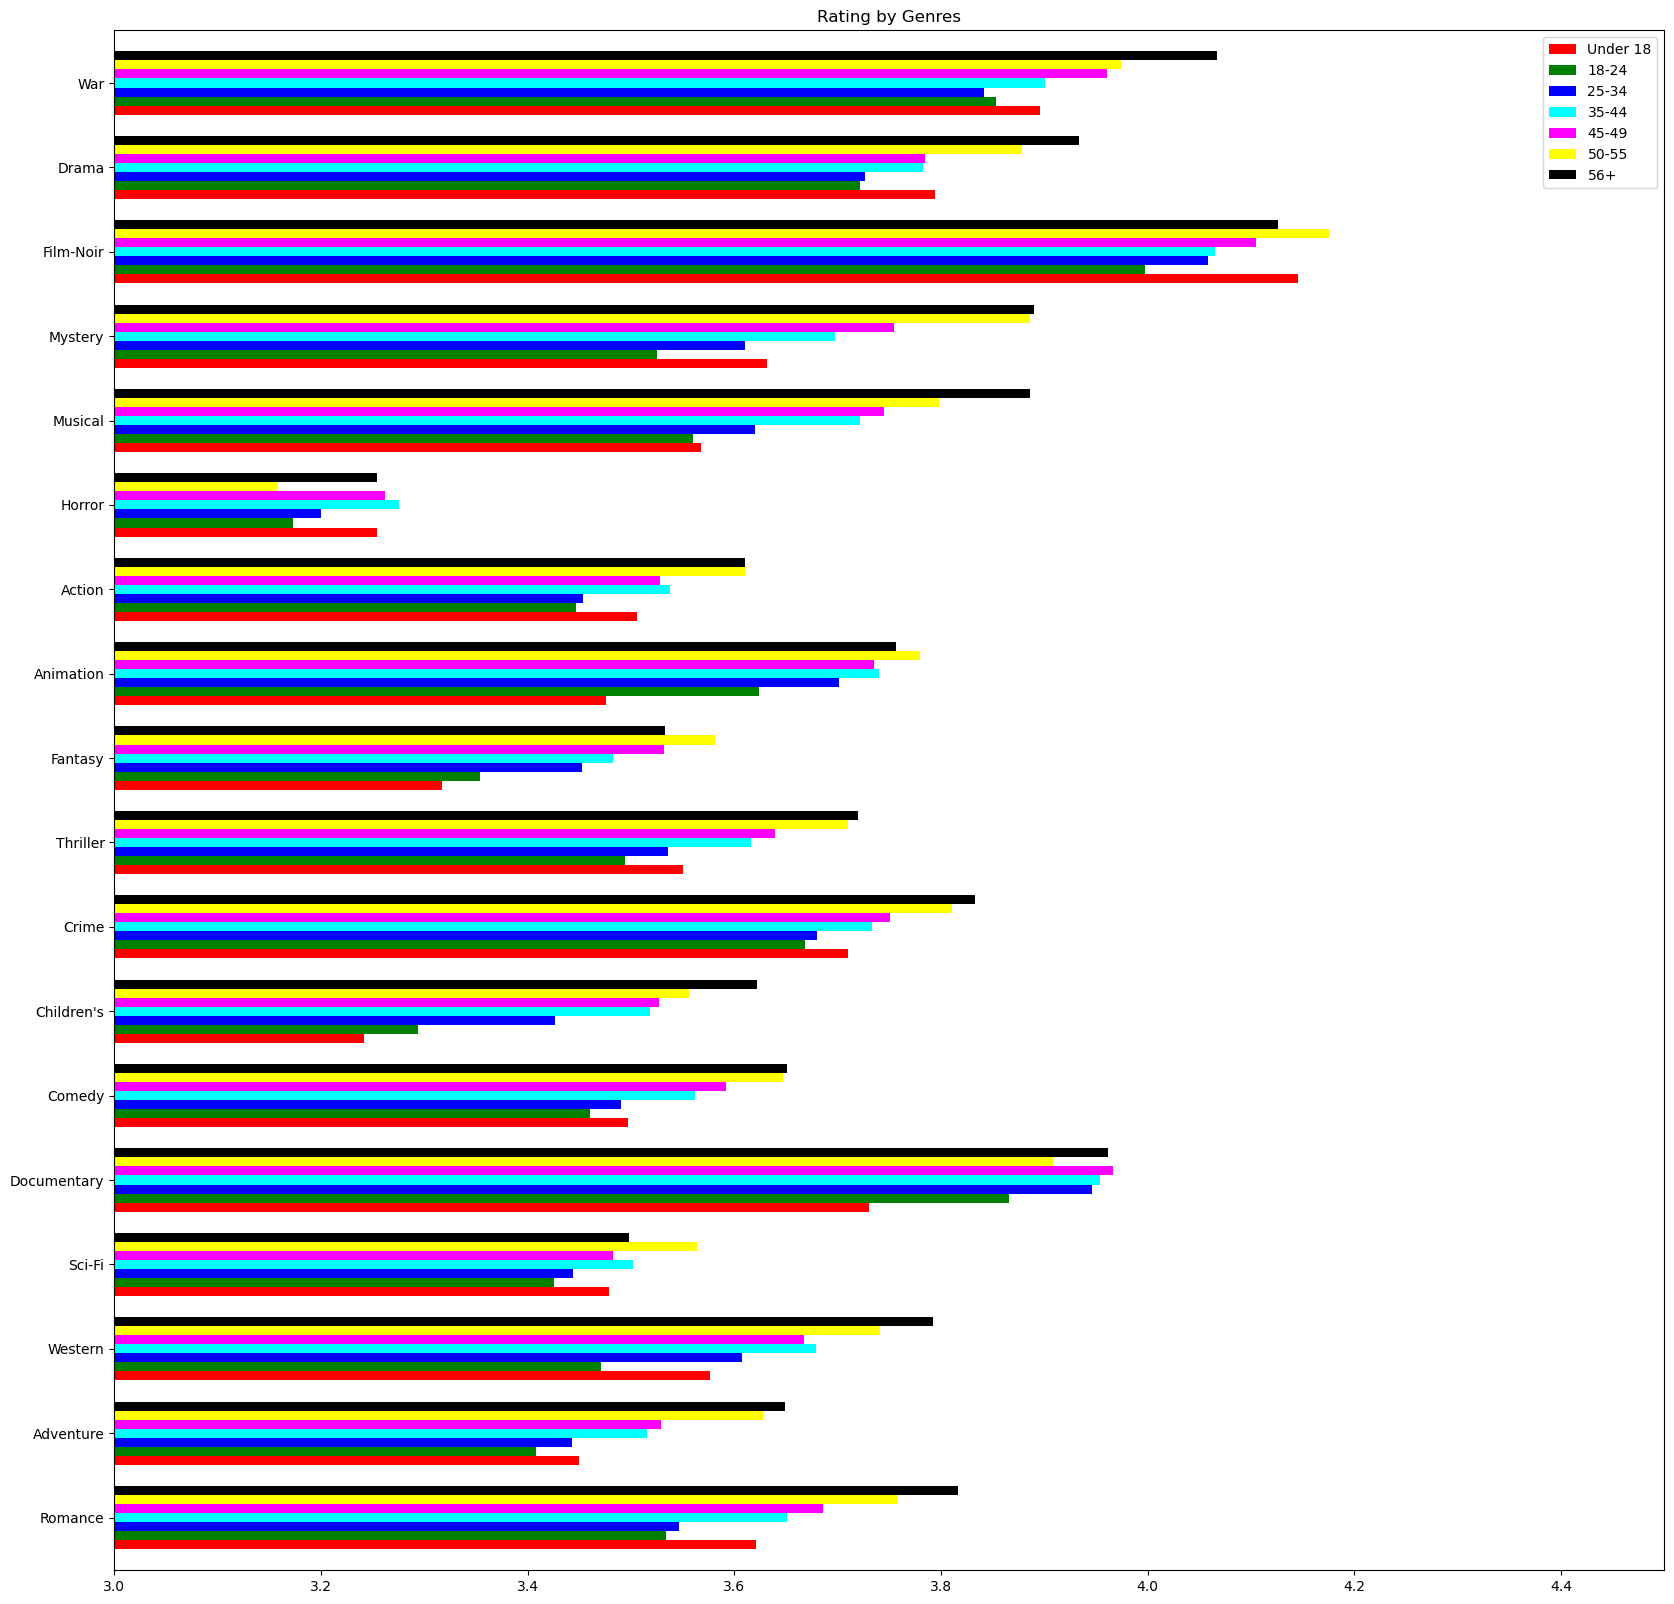

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) 
df_age.plot.barh(y=[('Under 18', 'mean'), ('18-24', 'mean'), ('25-34', 'mean'), ('35-44', 'mean'), ('45-49', 'mean'), ('50-55', 'mean'), ('56+', 'mean')], color= ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'],width=0.75,figsize=((20,20)))
plt.title('Rating by Genres')
plt.xlim(3, 4.5)
plt.legend(['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.savefig('ratings by genres.png')

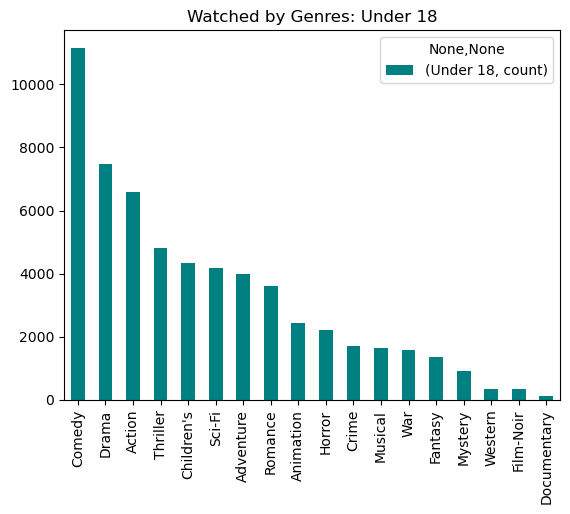

In [21]:
df_age.sort_values(by=('Under 18', 'count'), inplace=True, ascending=False)
df_age.plot.bar(y=('Under 18', 'count'), color=(0, 128/255, 128/255))
plt.title('Watched by Genres: Under 18')
plt.savefig('counts by genres: Under_18.png')

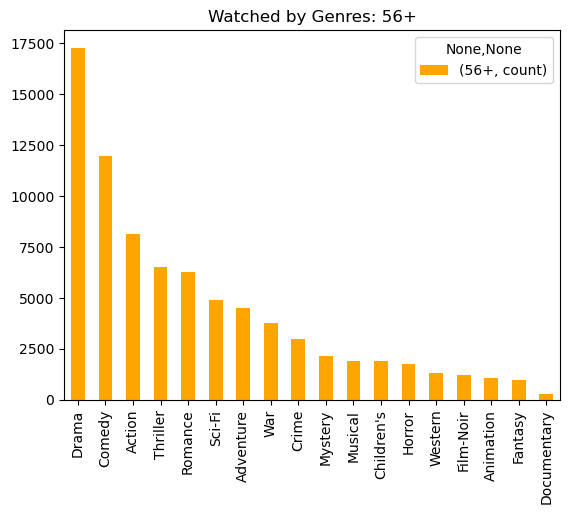

In [22]:
df_age.sort_values(by=('56+', 'count'), inplace=True, ascending=False)
df_age.plot.bar(y=('56+', 'count'), color='orange')
plt.title('Watched by Genres: 56+')
plt.savefig('counts by genres: 56+.png')

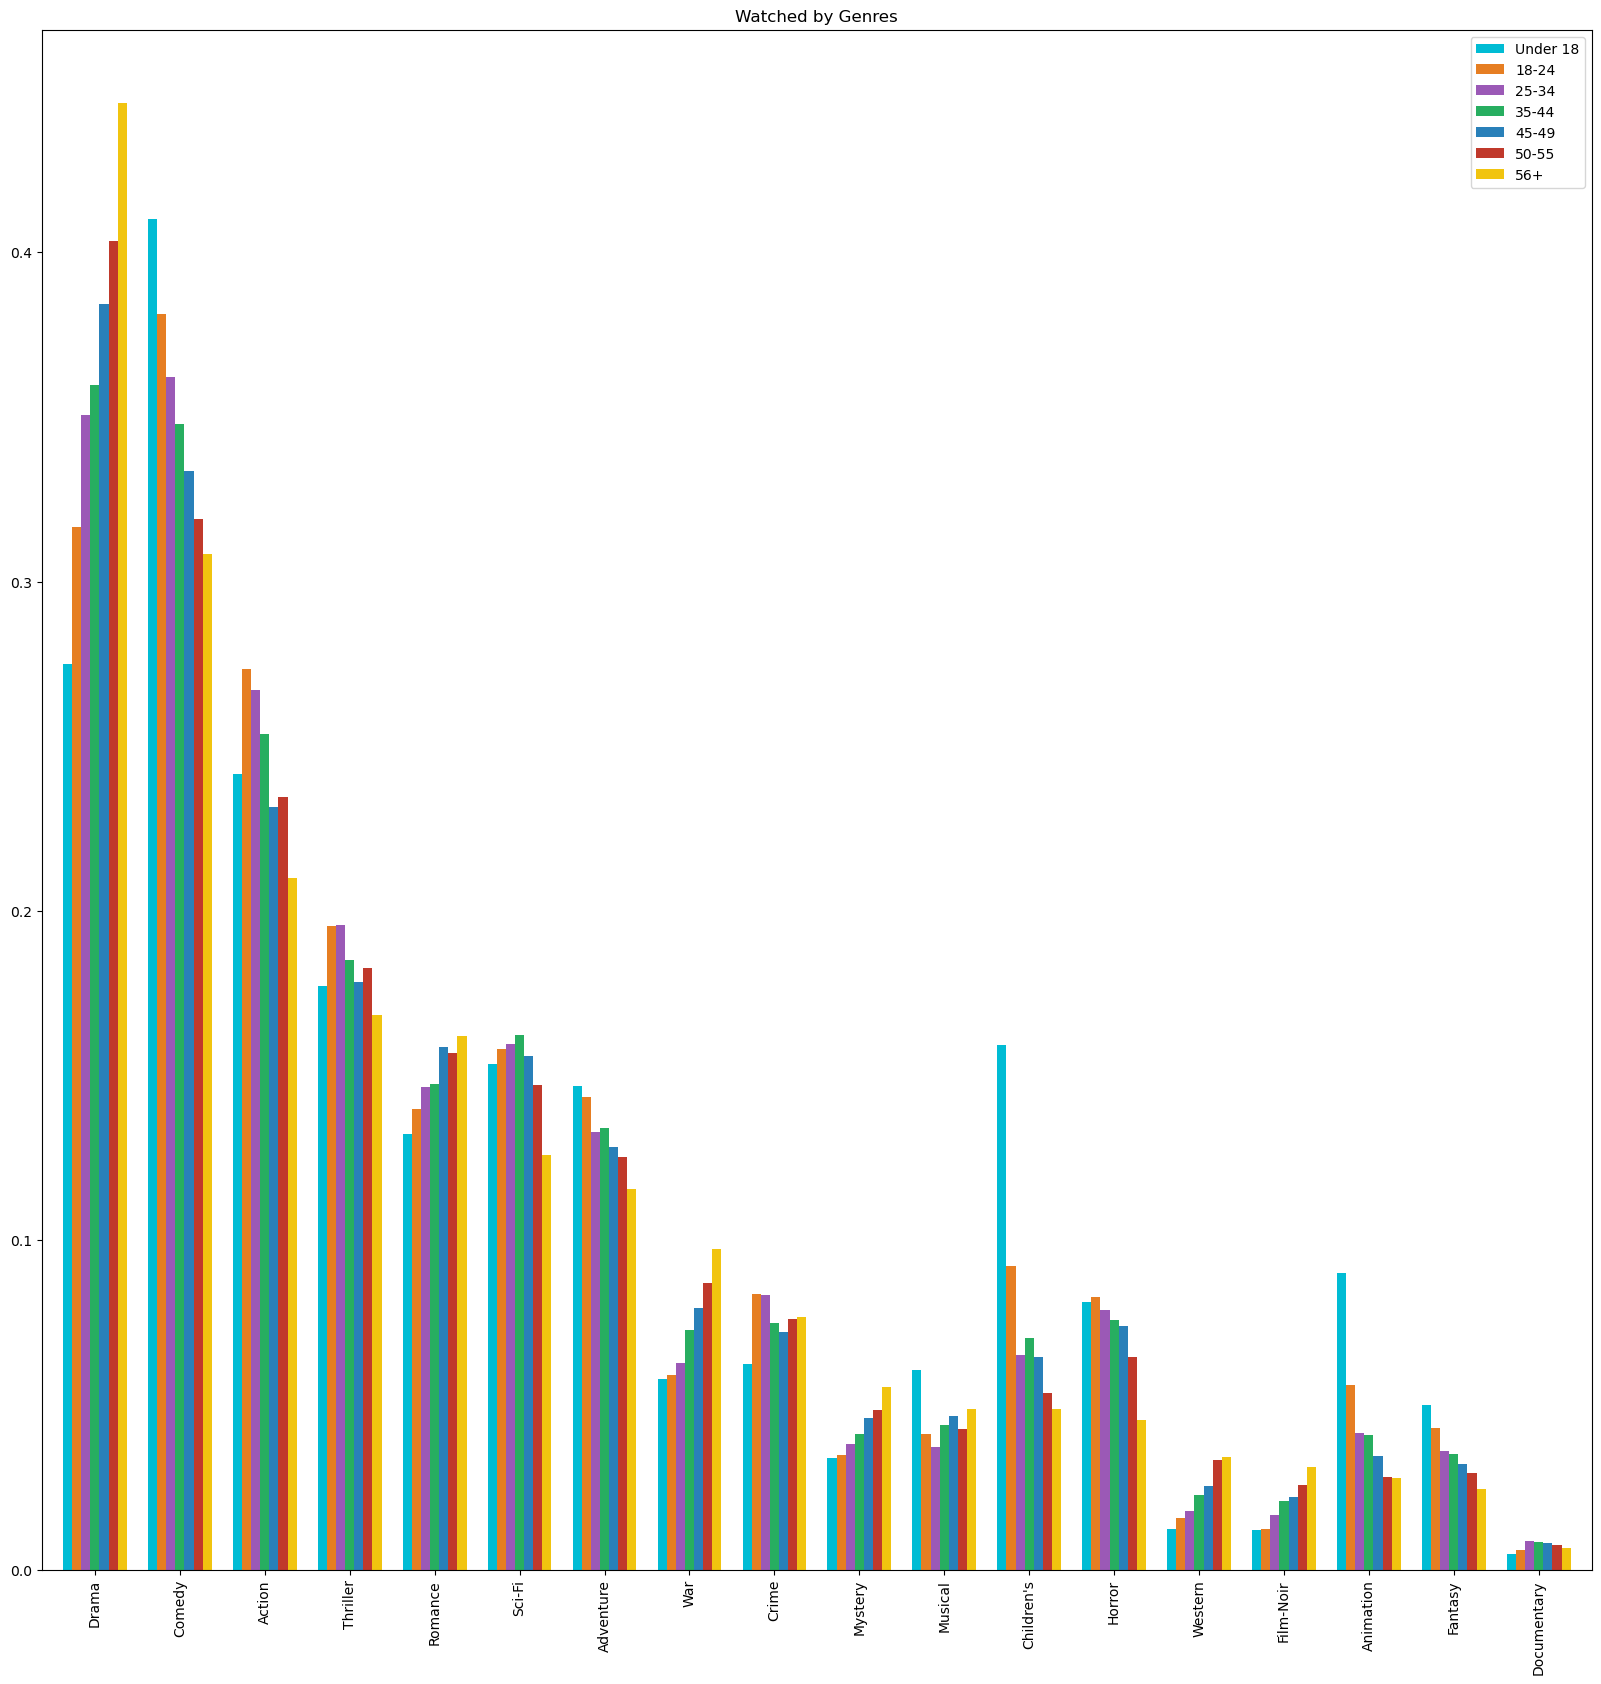

In [23]:
df_age.plot.bar(y=[('Under 18', 'portion'), ('18-24', 'portion'), ('25-34', 'portion'), ('35-44', 'portion'), ('45-49', 'portion'), ('50-55', 'portion'), ('56+', 'portion')], color= ['#00BCD4', '#E67E22', '#9B59B6', '#27AE60', '#2980B9', '#C0392B', '#F1C40F'], width=0.75, figsize=((20,20)))
plt.title('Watched by Genres')
plt.legend(['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.savefig('counts by genres.png')

## 二、用户对电影的打分预测

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime
from sklearn.decomposition import TruncatedSVD



In [25]:
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])
print(movies.shape)

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

(3883, 3)


In [26]:
ratings['user_id'] = ratings['user_id'] - 1
ratings['movie_id'] = ratings['movie_id'] - 1

ratings

,user_id,movie_id,rating,timestamp
0,0,1192,5,978300760
1,0,660,3,978302109
2,0,913,3,978301968
3,0,3407,4,978300275
4,0,2354,5,978824291
...,...,...,...,...
1000204,6039,1090,1,956716541
1000205,6039,1093,5,956704887
1000206,6039,561,5,956704746
1000207,6039,1095,4,956715648


In [27]:
# One-Hot编码处理性别、年龄、职业
encoder = OneHotEncoder()
user_features = encoder.fit_transform(users[['gender', 'age_desc', 'occ_desc']])
user_features_df = pd.DataFrame(user_features.toarray(), columns=encoder.get_feature_names_out(['gender', 'age_desc', 'occ_desc']))
display(user_features_df)


,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,age_desc_Under 18,occ_desc_K-12 student,...,occ_desc_other or not specified,occ_desc_programmer,occ_desc_retired,occ_desc_sales/marketing,occ_desc_scientist,occ_desc_self-employed,occ_desc_technician/engineer,occ_desc_tradesman/craftsman,occ_desc_unemployed,occ_desc_writer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6036,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 处理电影类型，先转换为列表格式
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
movie_genres_encoded = mlb.fit_transform(movies['genres'])
movie_genres_df = pd.DataFrame(movie_genres_encoded, columns=mlb.classes_)
movie_genres_df['movie_id'] = movies['movie_id'].values
movie_genres_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_id
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3948
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3949
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3950
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3951


In [29]:
#对于电影简介应用TF-IDF
movies_info['intro'] = movies_info['intro'].fillna('')
tfidf_vectorizer = TfidfVectorizer(max_features=200)
movie_synopses_tfidf = tfidf_vectorizer.fit_transform(movies_info['intro'])
movie_synopses_df = pd.DataFrame(movie_synopses_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
movie_synopses_df['movie_id'] = movies_info['movie_id'].values
movie_synopses_df

,about,after,against,agent,all,american,an,and,are,as,...,with,woman,women,work,world,year,years,york,young,movie_id
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.187437,0.000000,0.356874,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.246578,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.231143,0.156003,0.000000,0.297024,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,3
3,0.0,0.0,0.0,0.0,0.0,0.368192,0.000000,0.136679,0.000000,0.000000,...,0.204220,0.000000,0.433762,0.0,0.0,0.0,0.0,0.0,0.000000,4
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.374630,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.344112,0.367464,0.000000,...,0.257078,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.342184,193581
9738,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.111781,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,193583
9739,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.170412,0.000000,0.000000,...,0.254623,0.390214,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,193585
9740,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.119725,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,193587


In [31]:
#user_ratings_df = pd.merge(ratings, movie_genres_df, left_on="movie_id", right_index=True, how='outer')
#user_ratings_df = user_ratings_df[user_ratings_df['movie_id'] > 0]
#user_ratings_df = user_ratings_df.drop(user_ratings_df.index[-1])
#user_ratings_df.index = user_ratings_df.index.astype(int)
user_ratings_df = pd.merge(ratings, user_features_df, left_on="user_id", right_index=True, how='outer')
user_ratings_df = pd.merge(user_ratings_df, movie_genres_df, on='movie_id', how='left')
user_ratings_df = pd.merge(user_ratings_df, movie_synopses_df, on='movie_id', how='left')
columns_to_drop = ['timestamp', 'user_id', 'movie_id', 'rating']
user_ratings_df = user_ratings_df.drop(columns=columns_to_drop, errors='ignore')
user_ratings_df = user_ratings_df.fillna(0)
user_ratings_df

,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,age_desc_Under 18,occ_desc_K-12 student,...,will,with,woman,women,work,world,year,years,york,young
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.411515,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.220655,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.275021,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.366067
1000205,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1000206,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1000207,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(user_ratings_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=user_ratings_df.columns, index=user_ratings_df.index)

X_scaled_df

,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,age_desc_Under 18,occ_desc_K-12 student,...,will,with,woman,women,work,world,year,years,york,young
0,1.748894,-1.748894,-0.474064,-0.808818,-0.498377,-0.302068,-0.279532,-0.200838,5.979760,6.476562,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,6.230829,-0.309004
1,1.748894,-1.748894,-0.474064,-0.808818,-0.498377,-0.302068,-0.279532,-0.200838,5.979760,6.476562,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
2,1.748894,-1.748894,-0.474064,-0.808818,-0.498377,-0.302068,-0.279532,-0.200838,5.979760,6.476562,...,-0.112713,1.690807,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
3,1.748894,-1.748894,-0.474064,-0.808818,-0.498377,-0.302068,-0.279532,-0.200838,5.979760,6.476562,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
4,1.748894,-1.748894,-0.474064,-0.808818,-0.498377,-0.302068,-0.279532,-0.200838,5.979760,6.476562,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,-0.571790,0.571790,-0.474064,1.236372,-0.498377,-0.302068,-0.279532,-0.200838,-0.167231,-0.154403,...,-0.112713,2.218617,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,4.041275
1000205,-0.571790,0.571790,-0.474064,1.236372,-0.498377,-0.302068,-0.279532,-0.200838,-0.167231,-0.154403,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
1000206,-0.571790,0.571790,-0.474064,1.236372,-0.498377,-0.302068,-0.279532,-0.200838,-0.167231,-0.154403,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004
1000207,-0.571790,0.571790,-0.474064,1.236372,-0.498377,-0.302068,-0.279532,-0.200838,-0.167231,-0.154403,...,-0.112713,-0.451399,-0.239806,-0.099917,-0.115537,-0.189064,-0.138887,-0.153606,-0.184835,-0.309004


In [33]:
from sklearn.decomposition import PCA

# 初始化 PCA
pca = PCA()
pca.fit(X_scaled)

# 累计方差
cumulative_variance = pca.explained_variance_ratio_.cumsum()
# 选择达到 90% 累计方差的组件数量
n_components = (cumulative_variance > 0.5).argmax() + 1
print(f'Number of components to keep for 50% variance: {n_components}')
# 重新应用 PCA 保留所需的组件
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca

Number of components to keep for 50% variance: 76
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanc

array([[ 0.21764676, -0.45782148, -0.46479302, ..., -1.03914147,
         0.15293472,  0.5296943 ],
       [-0.17374775, -2.227451  ,  1.17368461, ..., -0.31850991,
        -0.15463906,  0.16693303],
       [-1.29530898, -1.72807086, -1.27711927, ..., -1.75816353,
         1.42291892,  0.2610646 ],
       ...,
       [-0.77629957, -1.79758218,  0.06679635, ..., -0.05097289,
         0.68711019, -0.04653174],
       [ 0.08112826, -0.97650574, -0.38243765, ...,  0.02882192,
         0.49733937, -0.23587297],
       [ 0.52635803, -0.9911398 , -0.3005263 , ...,  2.32538375,
         0.81196235, -3.35611995]])

In [34]:
def my_mean_squared_error(y_true, y_pred):
    # 计算 y_true 和 y_pred 之间的差异
    differences = y_true - y_pred
    
    # 计算差异的平方
    squared_differences = np.square(differences)
    
    # 计算均方误差
    mse = np.mean(squared_differences)
    
    return mse

In [35]:
X_pca.shape

(1000209, 76)

In [36]:
!pip install lightgbm

In [35]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_pca, ratings['rating'], test_size=0.2, random_state=42)
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42) 

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

In [37]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X_pca, ratings['rating'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('加载数据') 
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练')
gbm = lgb.train(params,
                train_data,
                num_boost_round=20,
                valid_sets=val_data,
                callbacks=[lgb.callback.early_stopping(stopping_rounds=5)])
print('预测数据')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

加载数据
开始训练


## 三、电影海报聚类分析

### 图像特征提取

In [25]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torch
from img2vec_pytorch import Img2Vec



# 文件夹路径
folder_path = "./poster"

# 初始化特征列表
features = []

img2vec_model = Img2Vec()
# 遍历文件夹中的每个海报图像
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # 读取图像
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # 提取颜色直方图和灰度直方图特征
        image = Image.open(image_path)
        if image.mode != 'RGB':
            image = image.convert('RGB')
            
        np_image = np.array(image)
        # 颜色直方图特征
        hist_color = [cv2.calcHist([np_image], [i], None, [256], [0,256]) for i in range(3)]
        hist_color_flat = np.concatenate(hist_color).flatten()
        # 转换为灰度图并计算灰度直方图
        gray_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2GRAY)
        hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()
        
        feature_vector = np.concatenate((hist_color_flat, hist_gray))

        # 添加图像文件前缀（电影ID）和特征向量到特征列表中
        features.append([filename.split('.')[0], feature_vector])

# 将特征列表转换为DataFrame
columns = ['movie_id', 'features']
df = pd.DataFrame(features, columns=columns)

# 输出带有电影ID和特征向量的DataFrame
print("DataFrame with Movie ID and Features:")
print(df)

DataFrame with Movie ID and Features:
     movie_id                                           features
0          63  [143.0, 42.0, 28.0, 86.0, 76.0, 48.0, 87.0, 73...
1         823  [1683.0, 1549.0, 462.0, 449.0, 312.0, 249.0, 2...
2        3578  [3739.0, 2174.0, 732.0, 1204.0, 1099.0, 804.0,...
3        2100  [5.0, 1.0, 3.0, 5.0, 3.0, 3.0, 7.0, 9.0, 16.0,...
4        1409  [211.0, 34.0, 37.0, 37.0, 46.0, 40.0, 47.0, 74...
...       ...                                                ...
2933     3213  [349.0, 67.0, 57.0, 97.0, 93.0, 94.0, 137.0, 1...
2934      190  [186.0, 55.0, 36.0, 64.0, 77.0, 56.0, 84.0, 96...
2935      184  [2430.0, 524.0, 504.0, 612.0, 652.0, 734.0, 12...
2936     2119  [5482.0, 3620.0, 2016.0, 884.0, 1547.0, 987.0,...
2937     1376  [44.0, 5.0, 4.0, 4.0, 9.0, 5.0, 6.0, 5.0, 6.0,...

[2938 rows x 2 columns]


### 降维

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

feature_vectors = np.array(df['features'].to_list())

# 进行标净化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(feature_vectors)

pca = PCA()
pca.fit(features_scaled)

# 计算累计方差
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 选择累积方差达到95%的主成分数量
num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

pca = PCA(n_components=num_components)
features_reduced = pca.fit_transform(features_scaled)

print(f"Reduced feature dimension: {num_components}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Component 1 associations with features:
Feature 0: -0.0246773362159729
Feature 1: -0.024559974670410156
Feature 2: -0.018644049763679504
Feature 3: -0.024911141023039818
Feature 4: -0.025893840938806534
Feature 5: -0.02608300745487213
Feature 6: -0.02977975644171238
Feature 7: -0.025794852524995804
Feature 8: -0.025535179302096367
Feature 9: -0.023336831480264664
Feature 10: -0.026789959520101547
Feature 11: -0.026817766949534416
Feature 12: -0.020791854709386826
Feature 13: -0.025881068781018257
Feature 14: -0.01921616867184639
Feature 15: -0.025790665298700333
Feature 16: -0.021004416048526764
Feature 17: -0.018359113484621048
Feature 18: -0.02185840532183647
Feature 19: -0.020207511261105537
Feature 20: -0.018875854089856148
Feature 21: -0.015633882954716682
Feature 22: -0.014330749399960041
Feature 23: -0.016259556636214256
Feature 24: -0.015276878140866756
Feature 25: -0.013114931993186474
Feature 26: -0.009065959602594376
Feature 27: -0.008322474546730518
Feature 28: -0.007994646

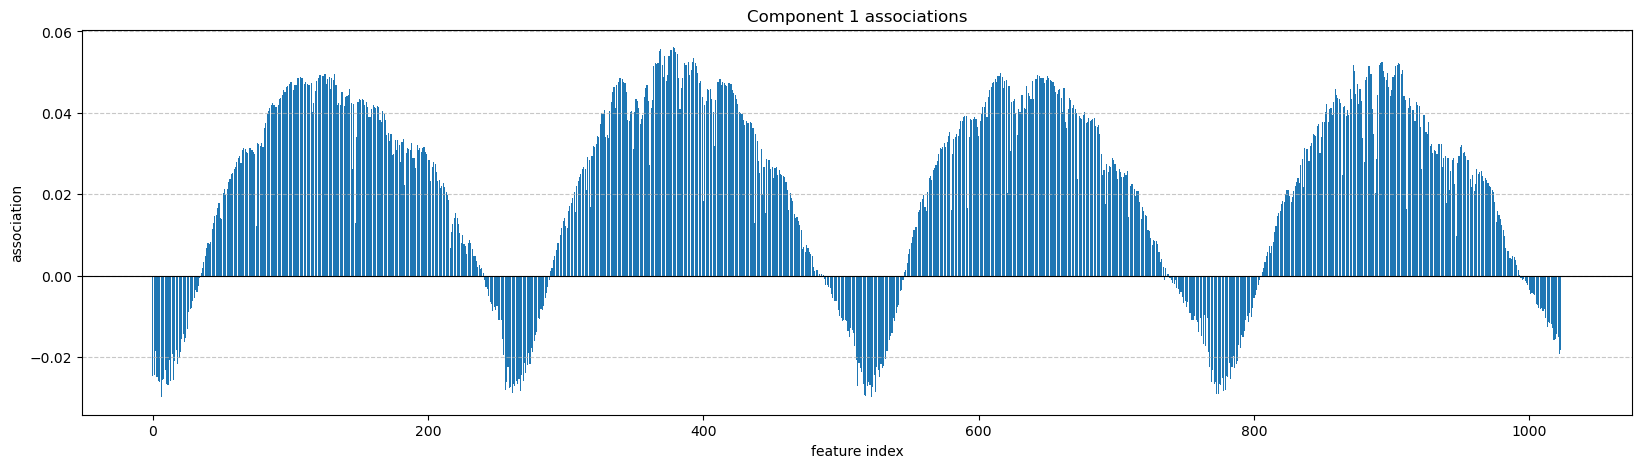

In [54]:
components = pca.components_

# 打印第一个主成分与原始特征的关联强度
print("Component 1 associations with features:")
for i, feature_association in enumerate(components[0]):
    print(f"Feature {i}: {feature_association}")
plt.figure(figsize=(20, 5))
plt.bar(range(len(components[0])), components[0])
plt.xlabel('feature index')
plt.ylabel('association')
plt.title('Component 1 associations')
plt.axhline(0, color='black',linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()